<a href="https://colab.research.google.com/github/vishal-pandey/iot-transfer/blob/master/beijing-ssim-training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
URL_beijing = "https://github.com/vishal-pandey/iot-transfer/raw/master/pm25_beijing.csv"

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
df_beijing = pd.read_csv(URL_beijing)

In [0]:
pm25_beijing = df_beijing.iloc[:, 0].values

In [0]:
pm25_beijing = pm25_beijing.reshape(-1, 1)

In [0]:
scaler_beijing = StandardScaler()
scaler_beijing.fit(pm25_beijing)
pm25_beijing = scaler_beijing.transform(pm25_beijing)

In [0]:
N = 20
O = 5
P = 20

In [0]:
X_beijing = []
y_beijing = []

for i in range(len(pm25_beijing) - (N + O + P)):
  temp = []
  temp1 = pm25_beijing[i : i+N]
  temp2 = [0 for _ in range(O)]
  temp3 = pm25_beijing[i+N+O : i+N+O+P]
  X_beijing.append(np.append(np.append(temp1, temp2), temp3))
  y_beijing.append(pm25_beijing[i+N : i+N+O].reshape(O))

In [0]:
X_beijing = np.array(X_beijing)
y_beijing = np.array(y_beijing)

In [10]:
print(X_beijing.shape)
print(y_beijing.shape)

(41712, 45)
(41712, 5)


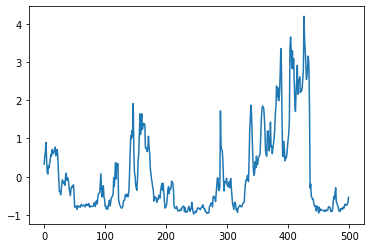

In [11]:
plt.plot(pm25_beijing[:500])
plt.show()

In [0]:
X_beijing_train, X_beijing_test, y_beijing_train, y_beijing_test = train_test_split(X_beijing, y_beijing)

In [0]:
X_beijing_train = X_beijing_train.reshape(X_beijing_train.shape[0], -1, 1)
X_beijing_test = X_beijing_test.reshape(X_beijing_test.shape[0], -1, 1)

In [14]:
!pip install keras-self-attention
from keras_self_attention import SeqSelfAttention

  Created wheel for keras-self-attention: filename=keras_self_attention-0.42.0-cp36-none-any.whl size=17296 sha256=7616c240a0b0fdff4382b5fe7102de7b696e0396338df06ee752071b41d862de
  Stored in directory: /root/.cache/pip/wheels/7b/05/a0/99c0cf60d383f0494e10eca2b238ea98faca9a1fe03cac2894
Successfully built keras-self-attention


Using TensorFlow backend.


In [0]:
from keras.layers import LSTM, Bidirectional, Dropout
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D

In [16]:
X_beijing_train.shape

(31284, 45, 1)

In [0]:
model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(X_beijing_train.shape[1],X_beijing_train.shape[2])))
model.add(SeqSelfAttention(attention_activation='sigmoid'))
model.add(LSTM(64))
model.add(Dense(O))
model.compile(optimizer='adam', loss='mse')

In [22]:
model.fit(X_beijing_train, y_beijing_train, epochs=20, validation_data=(X_beijing_test, y_beijing_test)) 

Train on 31284 samples, validate on 10428 samples
Epoch 1/20
31284/31284 [==============================] - 272s 9ms/step - loss: 0.2799 - val_loss: 0.1851
Epoch 2/20
31284/31284 [==============================] - 267s 9ms/step - loss: 0.1695 - val_loss: 0.1416
Epoch 3/20
31284/31284 [==============================] - 266s 9ms/step - loss: 0.1447 - val_loss: 0.1438
Epoch 4/20
31284/31284 [==============================] - 264s 8ms/step - loss: 0.1347 - val_loss: 0.1442
Epoch 5/20
31284/31284 [==============================] - 268s 9ms/step - loss: 0.1339 - val_loss: 0.1178
Epoch 6/20
31284/31284 [==============================] - 268s 9ms/step - loss: 0.1236 - val_loss: 0.1229
Epoch 7/20
31284/31284 [==============================] - 264s 8ms/step - loss: 0.1186 - val_loss: 0.1065
Epoch 8/20
31284/31284 [==============================] - 263s 8ms/step - loss: 0.1133 - val_loss: 0.1098
Epoch 9/20
31284/31284 [==============================] - 265s 8ms/step - loss: 0.1111 - val_loss: 0.1

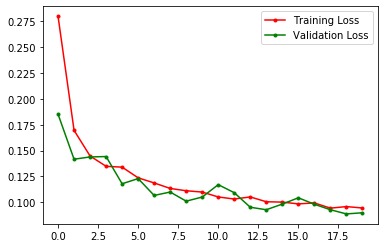

In [23]:
plt.plot(model.history.history['loss'], 'r.-', label="Training Loss")
plt.plot(model.history.history['val_loss'], 'g.-', label="Validation Loss")
plt.legend()
plt.show()

In [0]:
# plt.plot(model.history.history['acc'], 'r.-', label="Training Accuracy")
# plt.plot(model.history.history['val_acc'], 'g.-', label="Validation Accuracy")
# plt.legend()
# plt.show()

In [0]:
model.save('pm25_beijing_ssim_model.h5')